In [8]:
#Importing Libraries

from sklearn.model_selection         import train_test_split
from sklearn.ensemble                import ExtraTreesClassifier,RandomForestClassifier
from sklearn.ensemble                import BaggingClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.metrics                 import classification_report
from sklearn.metrics                 import accuracy_score,confusion_matrix
from sklearn.linear_model            import LogisticRegression
from sklearn.naive_bayes             import GaussianNB
from sklearn.neighbors               import KNeighborsClassifier
from sklearn.svm                     import LinearSVC
from sklearn.metrics                 import roc_curve,roc_auc_score
from sklearn.model_selection         import GridSearchCV

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

In [2]:
#Reading data

lv_shuttle_df = pd.read_csv('/Users/ujjwalrohit/Dataset for machine Learning/Shuttle.csv')

In [3]:
#Displaying the characteristics of the shuttle_scale data set

print("Dimension of the data set:",lv_shuttle_df.shape)
print("Names of the variables in the data set are :\n",lv_shuttle_df.columns)
print("The information of the data set is :\n",lv_shuttle_df.info())

Dimension of the data set: (43500, 11)
Names of the variables in the data set are :
 Index(['Id', '0', '1', '2', '3', '4', '5', '6', '7', '8', 'Category'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        43500 non-null  int64
 1   0         43500 non-null  int64
 2   1         43500 non-null  int64
 3   2         43500 non-null  int64
 4   3         43500 non-null  int64
 5   4         43500 non-null  int64
 6   5         43500 non-null  int64
 7   6         43500 non-null  int64
 8   7         43500 non-null  int64
 9   8         43500 non-null  int64
 10  Category  43500 non-null  int64
dtypes: int64(11)
memory usage: 3.7 MB
The information of the data set is :
 None


In [4]:
#Using a random seed function for generating the same data set

np.random.seed(3000)

lv_training,lv_test = train_test_split(lv_shuttle_df,test_size = 0.3)

lv_x_train = lv_training.drop(['Category'],axis = 1)
lv_y_train = lv_training['Category']

lv_x_test = lv_test.drop(['Category'],axis = 1)
lv_y_test = lv_test['Category']


In [7]:
#Creating extra tree model

print("---------------------EXTRA TREE MODEL-------------------")

lv_shuttle_extra_tree = ExtraTreesClassifier()
lv_shuttle_extra_tree.fit(lv_x_train,lv_y_train)

print("Accuracy of extra tree model on training set:",
     lv_shuttle_extra_tree.score(lv_x_train,lv_y_train))

print("Accuracy of extra tree model on test data set:",
     lv_shuttle_extra_tree.score(lv_x_test,lv_y_test))

print("Accuracy of extra trees model on test data set:",
     accuracy_score(lv_y_test,lv_shuttle_extra_tree.predict(lv_x_test)))

print("Results of confusion matrix :\n",
     confusion_matrix(lv_y_test,lv_shuttle_extra_tree.predict(lv_x_test)))



---------------------EXTRA TREE MODEL-------------------
Accuracy of extra tree model on training set: 1.0
Accuracy of extra tree model on test data set: 0.9991570881226054
Accuracy of extra trees model on test data set: 0.9991570881226054
Results of confusion matrix :
 [[10299     0     0     0     0     0]
 [    3     8     0     0     0     0]
 [    4     0    39     1     0     0]
 [    0     0     0  1971     0     0]
 [    2     0     0     0   719     0]
 [    0     0     1     0     0     3]]


In [9]:
#Creating a new extra trees model with grid search

print("----------------EXTRA TREE MODEL WITH BEST PARAMETERS------------------")

lv_param_grid = { 'max_features' :['auto','sqrt','log2'],
                  'max_depth'    :[4,6,8],
                  'min_samples_leaf' :[0.5,1],
                  'criterion' :['gini','entropy']
}

lv_shuttle_extra_tree_grid = ExtraTreesClassifier()

lv_shuttle_extra_tree_cv = GridSearchCV(estimator= lv_shuttle_extra_tree_grid,
                                       param_grid= lv_param_grid,
                                       cv = 5)
lv_shuttle_extra_tree_cv.fit(lv_x_train,lv_y_train)

print("Best parameters:\n",lv_shuttle_extra_tree_cv.best_params_)


----------------EXTRA TREE MODEL WITH BEST PARAMETERS------------------
Best parameters:
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1}


In [10]:
# Creating the model with best scores

lv_shuttle_extra_tree_best = ExtraTreesClassifier(
max_depth= lv_shuttle_extra_tree_cv.fit(lv_x_train,lv_y_train).best_params_['max_depth'],
max_features= lv_shuttle_extra_tree_cv.fit(lv_x_train,lv_y_train).best_params_['max_features'] ,
criterion= lv_shuttle_extra_tree_cv.fit(lv_x_train,lv_y_train).best_params_['criterion'],
min_samples_leaf=lv_shuttle_extra_tree_cv.fit(lv_x_train,lv_y_train).best_params_['min_samples_leaf']

)

In [11]:
#Evaluating the model considering best parameters

lv_shuttle_extra_tree_best.fit(lv_x_train,lv_y_train)

print("Accuracy on training set with best parameters:",
      lv_shuttle_extra_tree_best.score(lv_x_train,lv_y_train))
     

Accuracy on training set with best parameters: 0.969983579638752


In [12]:
#Predicting the new model

print("Classification Report:\n",
     classification_report(lv_y_test,lv_shuttle_extra_tree_best.predict(lv_x_test)))

Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98     10299
           2       1.00      0.18      0.31        11
           3       1.00      0.16      0.27        44
           4       0.99      0.83      0.91      1971
           5       1.00      1.00      1.00       721
           7       0.00      0.00      0.00         4

    accuracy                           0.97     13050
   macro avg       0.83      0.53      0.58     13050
weighted avg       0.97      0.97      0.97     13050



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Determining accuracy of the new model through confusion matrix

print("Accuracy of new extra tree model :",
     accuracy_score(lv_y_test,lv_shuttle_extra_tree_best.predict(lv_x_test)))

print("Results of confusion matrix :\n",
     confusion_matrix(lv_y_test,lv_shuttle_extra_tree_best.predict(lv_x_test)))

Accuracy of new extra tree model : 0.9706513409961686
Results of confusion matrix :
 [[10299     0     0     0     0     0]
 [    7     2     0     2     0     0]
 [   28     0     7     7     2     0]
 [  331     0     0  1640     0     0]
 [    2     0     0     0   719     0]
 [    4     0     0     0     0     0]]


In [14]:
# Creating a random forest model

print("----------------RANDOM FOREST MODEL---------------")

lv_shuttle_forest = RandomForestClassifier(random_state = 0)
lv_shuttle_forest.fit(lv_x_train,lv_y_train)

print("Accuracy of Random Forest model on training set",
     lv_shuttle_forest.score(lv_x_train,lv_y_train))

print("Accuracy of Random forest model on test_set:",
     accuracy_score(lv_y_test,lv_shuttle_forest.predict(lv_x_test)))

print("Results of confusion matrix:\n",
     confusion_matrix(lv_y_test,lv_shuttle_forest.predict(lv_x_test)))

----------------RANDOM FOREST MODEL---------------
Accuracy of Random Forest model on training set 1.0
Accuracy of Random forest model on test_set: 0.9994636015325671
Results of confusion matrix:
 [[10299     0     0     0     0     0]
 [    3     8     0     0     0     0]
 [    0     0    44     0     0     0]
 [    0     0     0  1971     0     0]
 [    2     0     0     0   719     0]
 [    0     0     2     0     0     2]]


In [17]:
#Creating a new random forest model with grid search

print("-------------------RANDOM FOREST MODEL WITH BEST PARAMETERS--------------")

lv_param_grid_tree = {'max_features':['auto','sqrt','log2'],
                      'criterion':['gini','entropy']}

lv_shuttle_forest_grid = RandomForestClassifier()

lv_shuttle_forest_cv = GridSearchCV(estimator=lv_shuttle_forest_grid,
                                   param_grid=lv_param_grid_tree,
                                   cv = 5 )
lv_shuttle_forest_cv.fit(lv_x_train,lv_y_train)

lv_shuttle_forest_best = RandomForestClassifier(
max_features= lv_shuttle_forest_cv.fit(lv_x_train,lv_y_train).best_params_['max_features'],
criterion= lv_shuttle_forest_cv.fit(lv_x_train,lv_y_train).best_params_['criterion'])

lv_shuttle_forest_best.fit(lv_x_train,lv_y_train)

print("Best Parameters:\n",lv_shuttle_forest_cv.best_params_)

print("Accuracy of new forest model :",
      accuracy_score(lv_y_test,lv_shuttle_forest_best.predict(lv_x_test)))

print("Classification Report:\n",
     classification_report(lv_y_test,lv_shuttle_forest_best.predict(lv_x_test)))

-------------------RANDOM FOREST MODEL WITH BEST PARAMETERS--------------
Best Parameters:
 {'criterion': 'gini', 'max_features': 'sqrt'}
Accuracy of new forest model : 0.9994636015325671
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     10299
           2       1.00      0.73      0.84        11
           3       0.96      1.00      0.98        44
           4       1.00      1.00      1.00      1971
           5       1.00      1.00      1.00       721
           7       1.00      0.50      0.67         4

    accuracy                           1.00     13050
   macro avg       0.99      0.87      0.91     13050
weighted avg       1.00      1.00      1.00     13050



In [22]:
#Creating a bagging model

print("-----------------------------BAGGING MODEL--------------------")

lv_shuttle_bag = BaggingClassifier(base_estimator=None,
                                  n_estimators=10,
                                  max_samples = 1.0,
                                  max_features=1.0,
                                  bootstrap=True )

lv_shuttle_bag.fit(lv_x_train,lv_y_train)

print("Accuracy of bagging model on training set:",
      lv_shuttle_bag.score(lv_x_train,lv_y_train))

print("Accuracy of bagging model on test set:",
     accuracy_score(lv_y_test,lv_shuttle_bag.predict(lv_x_test)))


print("Results of confusion matrix :\n",
     confusion_matrix(lv_y_test,lv_shuttle_bag.predict(lv_x_test)))



-----------------------------BAGGING MODEL--------------------
Accuracy of bagging model on training set: 0.9999671592775041
Accuracy of bagging model on test set: 0.9992337164750957
Results of confusion matrix :
 [[10299     0     0     0     0     0]
 [    4     7     0     0     0     0]
 [    0     0    44     0     0     0]
 [    4     0     0  1967     0     0]
 [    2     0     0     0   719     0]
 [    0     0     0     0     0     4]]


In [23]:
#Creating a decision tree model

print("--------------DECISION TREE MODEL--------------------")

lv_shuttle_tree = DecisionTreeClassifier(random_state=0)
lv_shuttle_tree.fit(lv_x_train,lv_y_train)

print("Accuracy of decision tree model on training set:",
     lv_shuttle_tree.score(lv_x_train,lv_y_train))

print("Accuracy of decision tree model on test set:",
     accuracy_score(lv_y_test,lv_shuttle_tree.predict(lv_x_test)))

print("Results of confusion matrix:\n",
     confusion_matrix(lv_y_test,lv_shuttle_tree.predict(lv_x_test)))

--------------DECISION TREE MODEL--------------------
Accuracy of decision tree model on training set: 1.0
Accuracy of decision tree model on test set: 0.9991570881226054
Results of confusion matrix:
 [[10299     0     0     0     0     0]
 [    2     9     0     0     0     0]
 [    3     0    41     0     0     0]
 [    4     0     0  1967     0     0]
 [    2     0     0     0   719     0]
 [    0     0     0     0     0     4]]


In [24]:
#Creating a logistic regression model

print("---------------LOGISTIC REGRESSION MODEL---------------")

lv_shuttle_log = LogisticRegression()
lv_shuttle_log.fit(lv_x_train,lv_y_train)

print("The accuracy of logistic regression is :",
     accuracy_score(lv_y_test,lv_shuttle_log.predict(lv_x_test)))

print("The Confusion matrix is :\n",
     confusion_matrix(lv_y_test,lv_shuttle_log.predict(lv_x_test)))

print("The classification report is :\n",
     classification_report(lv_y_test,lv_shuttle_log.predict(lv_x_test)))

---------------LOGISTIC REGRESSION MODEL---------------
The accuracy of logistic regression is : 0.8481226053639846
The Confusion matrix is :
 [[10157     0     0   142     0     0]
 [    5     0     0     5     1     0]
 [   26     0     0    18     0     0]
 [ 1157     0     0   814     0     0]
 [  202     0     0   422    97     0]
 [    4     0     0     0     0     0]]
The classification report is :
               precision    recall  f1-score   support

           1       0.88      0.99      0.93     10299
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        44
           4       0.58      0.41      0.48      1971
           5       0.99      0.13      0.24       721
           7       0.00      0.00      0.00         4

    accuracy                           0.85     13050
   macro avg       0.41      0.26      0.27     13050
weighted avg       0.84      0.85      0.82     13050



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Creating a Naive Bayes model

print("------------NAIVE BAYES MODEL-------------------")

lv_shuttle_naive = GaussianNB()
lv_shuttle_naive.fit(lv_x_train,lv_y_train)

print("The accuracy of naive Bayes model is :",
     accuracy_score(lv_y_test,lv_shuttle_naive.predict(lv_x_test)))

print("The confusion matrix is :\n",
     confusion_matrix(lv_y_test,lv_shuttle_naive.predict(lv_x_test)))

print("The Classification Report is :\n",
     classification_report(lv_y_test,lv_shuttle_naive.predict(lv_x_test)))

------------NAIVE BAYES MODEL-------------------
The accuracy of naive Bayes model is : 0.903448275862069
The confusion matrix is :
 [[9133  164  204  605    1    2  190]
 [   5    6    0    0    0    0    0]
 [  10    0   27    0    2    0    5]
 [   7   36    1 1925    1    1    0]
 [   0   24    0    0  695    2    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    4]]
The Classification Report is :
               precision    recall  f1-score   support

           1       1.00      0.89      0.94     10299
           2       0.03      0.55      0.05        11
           3       0.12      0.61      0.20        44
           4       0.76      0.98      0.86      1971
           5       0.99      0.96      0.98       721
           6       0.00      0.00      0.00         0
           7       0.02      1.00      0.04         4

    accuracy                           0.90     13050
   macro avg       0.42      0.71      0.44     13050
weighted avg       0.96   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------KNN MODEL----------------
Maximum accuracy using KNN model is : 0.9184674329501916


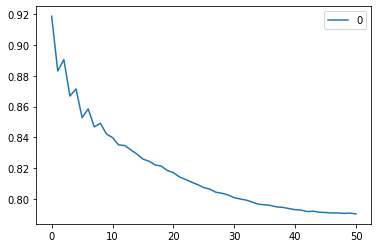

In [26]:
#Creating a KNN MODEL

print("---------------KNN MODEL----------------")

lv_knn_accuracy_list = []

for k in range(51):
    k = k + 1
    lv_shuttle_knn = KNeighborsClassifier(n_neighbors=k)
    lv_shuttle_knn.fit(lv_x_train,lv_y_train)
    lv_knn_accuracy_list.append(accuracy_score(lv_y_test,lv_shuttle_knn.predict(lv_x_test)))
    
    
print("Maximum accuracy using KNN model is :",max(lv_knn_accuracy_list))

lv_curve = pd.DataFrame(lv_knn_accuracy_list)
lv_curve.plot()
    

In [27]:
#Creating Support Vector Machines 

print("--------------SUPPORT VECTOR MACHINES MODEL---------------")

lv_shuttle_svm = LinearSVC(random_state=0)
lv_shuttle_svm.fit(lv_x_train,lv_y_train)

print("Accuracy of support vector machine model :",
     accuracy_score(lv_y_test,lv_shuttle_svm.predict(lv_x_test)))

print("The confusion matrix :\n",
     confusion_matrix(lv_y_test,lv_shuttle_svm.predict(lv_x_test)))

print("The Classfication Report :\n",
     classification_report(lv_y_test,lv_shuttle_svm.predict(lv_x_test)))

--------------SUPPORT VECTOR MACHINES MODEL---------------
Accuracy of support vector machine model : 0.8711877394636015
The confusion matrix :
 [[10264     0     0    35     0     0]
 [    7     0     0     3     0     1]
 [   32     0     0     8     4     0]
 [ 1351     0     0   496     0   124]
 [    2     0     0   110   609     0]
 [    4     0     0     0     0     0]]
The Classfication Report :
               precision    recall  f1-score   support

           1       0.88      1.00      0.93     10299
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        44
           4       0.76      0.25      0.38      1971
           5       0.99      0.84      0.91       721
           7       0.00      0.00      0.00         4

    accuracy                           0.87     13050
   macro avg       0.44      0.35      0.37     13050
weighted avg       0.86      0.87      0.85     13050



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
